# <span style='background :yellow' > AUTHOR: YASHIKA KHURANA </span>

## THE SPARKS FOUNDATION

## GRIP TASK 7 : Stock Market Prediction using Numerical and Textual Analysis

### AIM: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

 ***
 ---
 ___

# <span style='color:orange'> Numerical analysis  </span>

## <span style='color:Blue'> Importing library files  </span>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Reading data from Yahoo

In [2]:

df = web.DataReader('^BSESN', data_source='yahoo', start='2001-01-01', end='2020-03-08') 

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,4028.570068,3929.370117,3953.219971,4018.879883,0.0,4018.879883
2001-01-03,4067.659912,3977.580078,3977.580078,4060.020020,0.0,4060.020020
2001-01-04,4180.970215,4109.549805,4180.970215,4115.370117,0.0,4115.370117
2001-01-05,4195.009766,4115.350098,4116.339844,4183.729980,0.0,4183.729980
2001-01-08,4206.720215,4101.529785,4164.759766,4120.430176,0.0,4120.430176
...,...,...,...,...,...,...
2020-03-02,39083.171875,37785.988281,38910.949219,38144.019531,13400.0,38144.019531
2020-03-03,38754.238281,38142.300781,38480.890625,38623.699219,10600.0,38623.699219
2020-03-04,38791.699219,37846.101562,38715.718750,38409.480469,15300.0,38409.480469


In [4]:
df.shape

(4720, 6)

### Visualising closing trends of BSESN

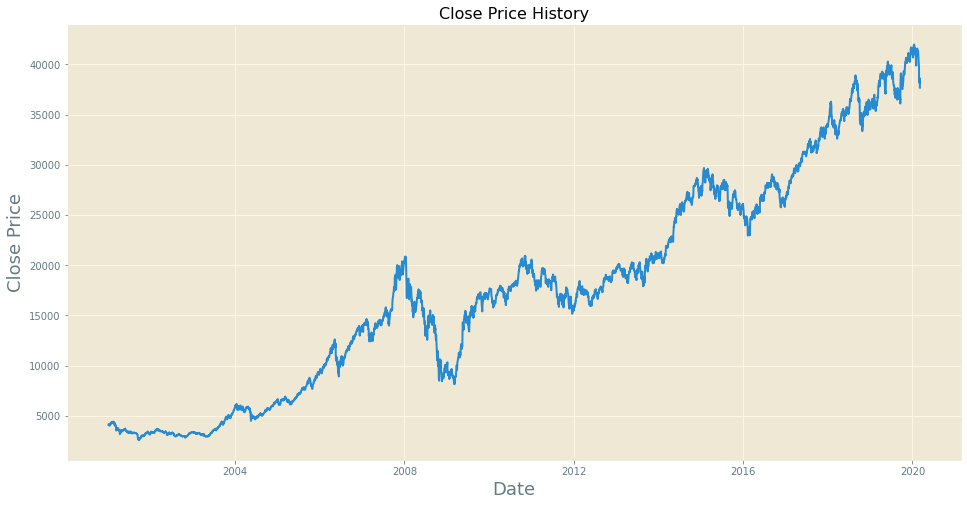

In [5]:
plt.figure(figsize=(16,8))
plt.style.use('Solarize_Light2')
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

### Processing data

In [6]:
data=pd.DataFrame(df["Close"])

In [7]:
data

,Close
Date,
2001-01-02,4018.879883
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-08,4120.430176
...,...
2020-03-02,38144.019531
2020-03-03,38623.699219
2020-03-04,38409.480469


In [8]:
dataset = data.values

In [9]:
training_data_len = math.ceil( len(dataset) *.8) 

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [11]:
train_data = scaled_data[0:training_data_len  , : ]

In [12]:
train_data.shape

(3776, 1)

In [13]:
len(train_data)

3776

In [14]:
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [15]:
len(x_train)

3716

In [16]:
len(y_train)

3716

In [17]:
x_train=np.array(x_train)

In [18]:
y_train=np.array(y_train)

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3716/3716 [==============================] - 102s 27ms/step - loss: 5.5162e-04


In [23]:
test_data = scaled_data[training_data_len - 60: , : ]

In [24]:
scaled_data.shape

(4720, 1)

In [25]:
test_data.shape

(1004, 1)

In [26]:
training_data_len

3776

In [27]:
y_test =  dataset[training_data_len : , : ]

In [28]:
y_test.shape

(944, 1)

In [29]:
x_test=[]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [30]:
len(x_test)

944

In [31]:

x_test = np.array(x_test)

In [32]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [33]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [34]:
predictions

array([[25148.162],
       [25081.72 ],
       [25116.822],
       [25207.402],
       [25282.414],
       [25370.4  ],
       [25400.67 ],
       [25426.043],
       [25462.832],
       [25486.898],
       [25451.766],
       [25379.408],
       [25289.523],
       [25218.219],
       [25259.988],
       [25425.184],
       [25667.408],
       [25917.58 ],
       [26120.457],
       [26274.035],
       [26397.93 ],
       [26484.977],
       [26528.172],
       [26580.338],
       [26627.955],
       [26623.602],
       [26575.951],
       [26477.564],
       [26372.766],
       [26336.36 ],
       [26305.426],
       [26301.143],
       [26349.959],
       [26407.127],
       [26452.479],
       [26523.766],
       [26496.475],
       [26430.932],
       [26377.014],
       [26371.69 ],
       [26431.586],
       [26535.393],
       [26664.412],
       [26765.316],
       [26842.074],
       [26881.602],
       [26977.77 ],
       [27111.031],
       [27239.84 ],
       [27365.469],


In [35]:
y_test

array([[25228.5       ],
       [25688.859375  ],
       [25772.52929688],
       [25597.01953125],
       [25790.22070312],
       [25489.5703125 ],
       [25653.23046875],
       [25773.609375  ],
       [25704.609375  ],
       [25399.72070312],
       [25301.90039062],
       [25230.359375  ],
       [25305.47070312],
       [25881.16992188],
       [26366.6796875 ],
       [26653.59960938],
       [26725.59960938],
       [26667.9609375 ],
       [26713.9296875 ],
       [26843.140625  ],
       [26843.02929688],
       [26777.44921875],
       [27009.66992188],
       [27020.66015625],
       [26763.4609375 ],
       [26635.75      ],
       [26396.76953125],
       [26395.7109375 ],
       [26726.33984375],
       [26525.4609375 ],
       [26625.91015625],
       [26866.91992188],
       [26812.77929688],
       [26765.65039062],
       [27002.22070312],
       [26397.7109375 ],
       [26402.9609375 ],
       [26524.55078125],
       [26740.390625  ],
       [26999.72070312],


### Comparing predictions and actual values

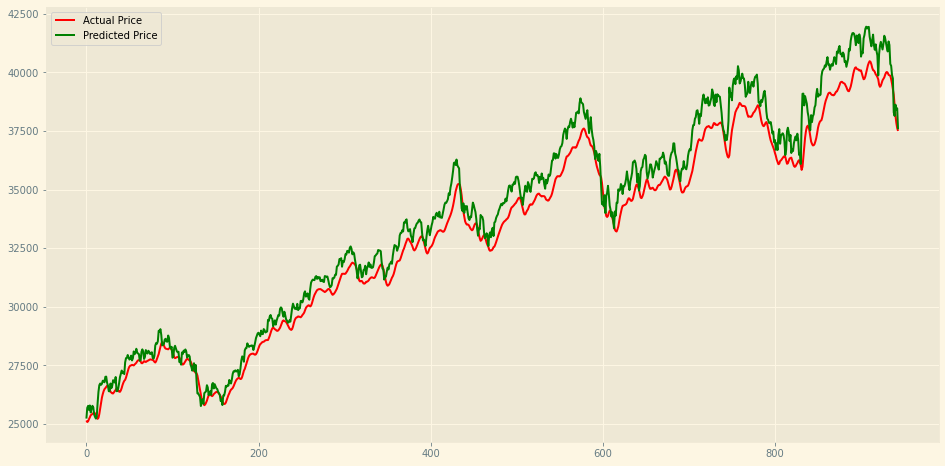

In [36]:
plt.figure(figsize=(16,8))
plt.style.use('Solarize_Light2')
plt.plot(predictions,color='red', label='Actual Price')
plt.plot(y_test, color='green',label='Predicted Price')
plt.legend()
plt.show()

### Evaluating model & visualising

In [37]:
mean_abs_perc_err = np.mean(np.abs(predictions - y_test)/np.abs(y_test))

In [38]:
mean_abs_perc_err

0.021787906996211283

<ipython-input-39-a59e10ae0945>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


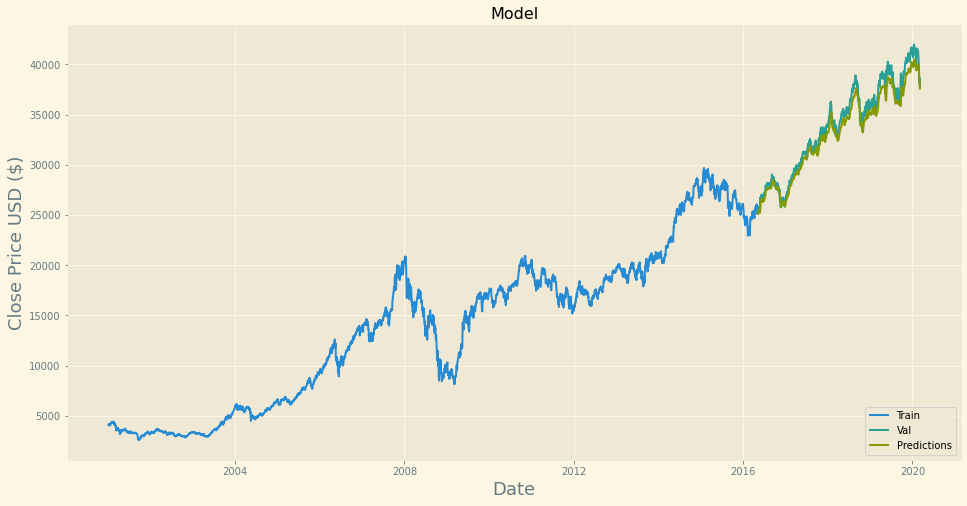

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
valid

,Close,Predictions
Date,,
2016-05-06,25228.500000,25148.162109
2016-05-09,25688.859375,25081.720703
2016-05-10,25772.529297,25116.822266
2016-05-11,25597.019531,25207.402344
2016-05-12,25790.220703,25282.414062
...,...,...
2020-03-02,38144.019531,38612.851562
2020-03-03,38623.699219,38153.417969
2020-03-04,38409.480469,37847.914062


In [41]:
#Get the quote
bsesn_quote = web.DataReader('^BSESN', data_source='yahoo', start='2012-01-01', end='2020-03-08') 
#Create a new dataframe
new_df = bsesn_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[37296.816]]


In [42]:
bsesn_quote2 = web.DataReader('^BSESN', data_source='yahoo', start='2012-01-01', end='2020-03-09')
print(bsesn_quote2['Close'])

Date
2012-01-02    15517.919922
2012-01-03    15939.360352
2012-01-04    15882.639648
2012-01-05    15857.080078
2012-01-06    15867.730469
                  ...     
2020-03-03    38623.699219
2020-03-04    38409.480469
2020-03-05    38470.609375
2020-03-06    37576.621094
2020-03-09    35634.949219
Name: Close, Length: 2004, dtype: float64


# <span style='color:orange'> Sentiment analysis  </span>

## <span style='color:Blue'> Importing library files  </span>

In [80]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## <span style='color:Blue'> Loading data </span>

### Data Source: Kaggle India News Headlines

In [56]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


### Processing

In [57]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [58]:

df_news.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [59]:
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [60]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news.head(10)

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
5,2001-01-06,Light combat craft takes India into club class...
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
8,2001-01-09,Financier Bharat Shah held for alleged links w...
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...


In [61]:
df_news.shape

(7080, 2)

In [63]:

#Cleaning headlines
ps= PorterStemmer()
c = []
for i in range(0,int(len(df_news['News'])/2)):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [64]:

df_news['News'] = pd.Series(c)
df_news

<ipython-input-64-7ccdfe4c772a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['News'] = pd.Series(c)


,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
7075,2020-06-26,NaN
7076,2020-06-27,NaN
7077,2020-06-28,NaN
7078,2020-06-29,NaN


In [76]:
df_news1=pd.DataFrame(df_news[:3540])

In [77]:
df_news1

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
3535,2010-10-17,review nokia e way quickli share file celebrat...
3536,2010-10-18,mind set fall bruce lee arm sakshi pradhan pre...
3537,2010-10-19,chitrangda hold fort shailendra singh b day pa...
3538,2010-10-20,dist offici face chief seci music munda cleans...


In [79]:
df_news1.shape

(3540, 2)

In [81]:
vader = SentimentIntensityAnalyzer()

df_news1['Compound'] = [vader.polarity_scores(v)['compound'] for v in df_news1['News']]

In [82]:
df_news1

,Date,News,Compound
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.2023
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,-0.8555
2,2001-01-03,powerless north india grope dark think laxman ...,-0.5994
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.9169
4,2001-01-05,light combat craft take india club class hawk ...,-0.3612
...,...,...,...
3535,2010-10-17,review nokia e way quickli share file celebrat...,-0.9993
3536,2010-10-18,mind set fall bruce lee arm sakshi pradhan pre...,-0.9995
3537,2010-10-19,chitrangda hold fort shailendra singh b day pa...,-0.9995
3538,2010-10-20,dist offici face chief seci music munda cleans...,-0.9996


In [84]:
data

,Close
Date,
2001-01-02,4018.879883
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-08,4120.430176
...,...
2020-03-02,38144.019531
2020-03-03,38623.699219
2020-03-04,38409.480469


In [85]:
df_merge = pd.merge(data, df_news1, how='inner', on='Date')
df_merge

,Date,Close,News,Compound
0,2001-01-02,4018.879883,statu quo disturb ayodhya say vajpaye fissur h...,-0.8555
1,2001-01-03,4060.020020,powerless north india grope dark think laxman ...,-0.5994
2,2001-01-04,4115.370117,string pull stephen hawk india vajpaye give bi...,0.9169
3,2001-01-05,4183.729980,light combat craft take india club class hawk ...,-0.3612
4,2001-01-08,4120.430176,sangh parivar babri panel ant frontrunn key us...,-0.6808
...,...,...,...,...
2390,2010-10-15,20125.050781,aakrosh movi review srk copi rajnikanth rgv ep...,-0.9994
2391,2010-10-18,20168.890625,mind set fall bruce lee arm sakshi pradhan pre...,-0.9995
2392,2010-10-19,19983.130859,chitrangda hold fort shailendra singh b day pa...,-0.9995
2393,2010-10-20,19872.150391,dist offici face chief seci music munda cleans...,-0.9996


In [90]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [88]:
pip install TextBlob

     |████████████████████████████████| 636 kB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [89]:
from textblob import TextBlob

In [91]:
df_merge['Subjectivity'] = df_merge['News'].apply(getSubjectivity)
df_merge['Polarity'] = df_merge['News'].apply(getPolarity)
df_merge

,Date,Close,News,Compound,Subjectivity,Polarity
0,2001-01-02,4018.879883,statu quo disturb ayodhya say vajpaye fissur h...,-0.8555,0.298148,0.099074
1,2001-01-03,4060.020020,powerless north india grope dark think laxman ...,-0.5994,0.429167,0.025000
2,2001-01-04,4115.370117,string pull stephen hawk india vajpaye give bi...,0.9169,0.475140,0.032481
3,2001-01-05,4183.729980,light combat craft take india club class hawk ...,-0.3612,0.458412,0.296404
4,2001-01-08,4120.430176,sangh parivar babri panel ant frontrunn key us...,-0.6808,0.486204,-0.035142
...,...,...,...,...,...,...
2390,2010-10-15,20125.050781,aakrosh movi review srk copi rajnikanth rgv ep...,-0.9994,0.386083,0.023402
2391,2010-10-18,20168.890625,mind set fall bruce lee arm sakshi pradhan pre...,-0.9995,0.428399,0.026048
2392,2010-10-19,19983.130859,chitrangda hold fort shailendra singh b day pa...,-0.9995,0.400614,0.050463
2393,2010-10-20,19872.150391,dist offici face chief seci music munda cleans...,-0.9996,0.378495,0.078286


In [92]:
df_1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound']]

In [93]:
df_1

,Close,Subjectivity,Polarity,Compound
0,4018.879883,0.298148,0.099074,-0.8555
1,4060.020020,0.429167,0.025000,-0.5994
2,4115.370117,0.475140,0.032481,0.9169
3,4183.729980,0.458412,0.296404,-0.3612
4,4120.430176,0.486204,-0.035142,-0.6808
...,...,...,...,...
2390,20125.050781,0.386083,0.023402,-0.9994
2391,20168.890625,0.428399,0.026048,-0.9995
2392,19983.130859,0.400614,0.050463,-0.9995
2393,19872.150391,0.378495,0.078286,-0.9996


In [96]:

mm = MinMaxScaler()
df_2 = pd.DataFrame(mm.fit_transform(df_1))
df_2.columns = df_1.columns
df_2.index = df_1.index
df_2.head(n=10)

,Close,Subjectivity,Polarity,Compound
0,0.077642,0.298148,0.427525,0.072207
1,0.079893,0.429167,0.314996,0.200270
2,0.082922,0.475140,0.326361,0.958496
3,0.086663,0.458412,0.727297,0.319382
4,0.083199,0.486204,0.223631,0.159566
5,0.083466,0.453860,0.363957,0.003550
6,0.079215,0.000000,0.277017,0.500000
7,0.078093,0.500000,0.656802,0.601160
8,0.092845,0.238603,0.388401,0.982198
9,0.094472,0.191270,0.397102,0.613161


In [98]:
x_data=df_2[['Subjectivity','Polarity','Compound']]
#df_1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound']]
y_data=df_2[['Close']]

In [99]:
x_data

,Subjectivity,Polarity,Compound
0,0.298148,0.427525,0.072207
1,0.429167,0.314996,0.200270
2,0.475140,0.326361,0.958496
3,0.458412,0.727297,0.319382
4,0.486204,0.223631,0.159566
...,...,...,...
2390,0.386083,0.312569,0.000250
2391,0.428399,0.316588,0.000200
2392,0.400614,0.353677,0.000200
2393,0.378495,0.395944,0.000150


In [100]:
y_data

,Close
0,0.077642
1,0.079893
2,0.082922
3,0.086663
4,0.083199
...,...
2390,0.959050
2391,0.961450
2392,0.951284
2393,0.945211


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 0)


In [105]:
x_train.shape

(1916, 3)

In [106]:
y_train.shape

(1916, 1)

In [107]:
x_test.shape

(479, 3)

In [108]:
y_test.shape

(479, 1)

### Creating model & training

In [109]:
from sklearn.ensemble import RandomForestRegressor


In [110]:
rforest = RandomForestRegressor()
rforest.fit(x_train, y_train)


<ipython-input-110-ad28e555558e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train, y_train)


RandomForestRegressor()

In [111]:
predictions=rforest.predict(x_test)

In [112]:
predictions

array([0.36339563, 0.65707307, 0.3115685 , 0.72460117, 0.33432391,
       0.36893764, 0.50188193, 0.61891796, 0.48701748, 0.26746202,
       0.52239222, 0.40241481, 0.43073329, 0.4689875 , 0.29876177,
       0.56177358, 0.27589555, 0.32790021, 0.20084063, 0.26017674,
       0.33609926, 0.40213672, 0.3107977 , 0.63976999, 0.42654158,
       0.41195965, 0.45201464, 0.25831569, 0.59610667, 0.53159872,
       0.62468623, 0.381498  , 0.54169499, 0.40152276, 0.40172756,
       0.44731782, 0.46519968, 0.64160428, 0.53965044, 0.16174249,
       0.45445509, 0.23743208, 0.29093948, 0.35335226, 0.18200734,
       0.26370718, 0.35856783, 0.15297396, 0.11101693, 0.62136484,
       0.49995334, 0.47029863, 0.22566622, 0.57765082, 0.4223655 ,
       0.2826241 , 0.55355745, 0.2390537 , 0.65385948, 0.15774327,
       0.27892825, 0.40599466, 0.23767345, 0.53912467, 0.52532498,
       0.47648127, 0.23723015, 0.37914968, 0.38350735, 0.19772437,
       0.43205999, 0.36439221, 0.54238504, 0.4457636 , 0.40368

In [114]:
type(predictions)

numpy.ndarray

In [117]:
predictions=predictions.reshape((-1,1))

In [118]:
predictions.shape

(479, 1)

## BIBLIOGRAPHY

### * Randerson's articles
### * ML Mastery blogs
### * Krish Naik's videos